In [1]:
!pip install kaggle


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other


In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/gtzan-dataset-music-genre-classification.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
import librosa

path = '/content/Data/genres_original'

classes = os.listdir(path)
print(classes)

audio = []
sample_rates = []
label = []
for genre in classes:
    genre_path = os.path.join(path, genre)
    for file_name in os.listdir(genre_path):
        file_path = os.path.join(genre_path, file_name)
        try:
            wave, sample_rate = librosa.load(file_path, mono=True, sr=None)
            audio.append(wave)
            sample_rates.append(sample_rate)
            label.append(genre)
        except:
            continue

['metal', 'blues', 'pop', 'disco', 'rock', 'jazz', 'hiphop', 'country', 'reggae', 'classical']


<ipython-input-7-97c965e463fa>:17: UserWarning: PySoundFile failed. Trying audioread instead.
  wave, sample_rate = librosa.load(file_path, mono=True, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [8]:
import numpy as np
print(audio[1])

[0.22305298 0.35424805 0.42669678 ... 0.12341309 0.17764282 0.23867798]


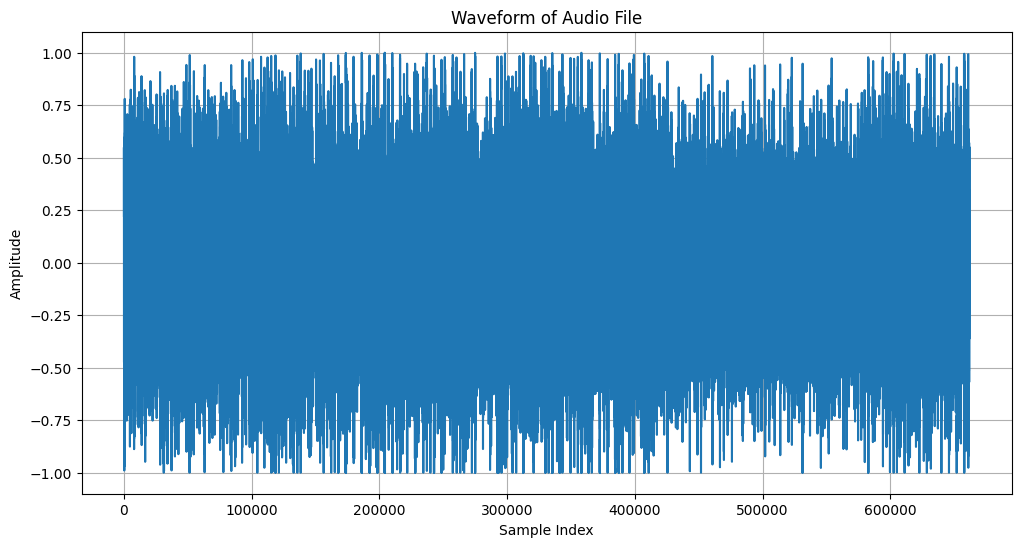

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(audio[1])
plt.title("Waveform of Audio File")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [10]:
import IPython.display as ipd
ipd.Audio('/content/Data/genres_original/blues/blues.00000.wav')

In [11]:
import pandas as pd
print(len(audio))
print(len(sample_rates))
print(len(label))
df = pd.DataFrame({
    'audio': audio,
    'sample_rate': sample_rates,
    'class': label
})

999
999
999


In [12]:
df['sample_rate'].value_counts()

,count
sample_rate,
22050,999


In [13]:
def extract_mfcc(audio, sr=22050, n_mfcc=13):
    return np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc).T, axis=0)

# Function to extract Chroma features
def extract_chroma(audio, sr=22050):
    return np.mean(librosa.feature.chroma_stft(y=audio, sr=sr).T, axis=0)

# Function to extract Spectral Contrast
def extract_contrast(audio, sr=22050):
    return np.mean(librosa.feature.spectral_contrast(y=audio, sr=sr).T, axis=0)

# Function to extract Spectral Centroid
def extract_centroid(audio, sr=22050):
    return np.mean(librosa.feature.spectral_centroid(y=audio, sr=sr).T)

# Function to extract Spectral Bandwidth
def extract_bandwidth(audio, sr=22050):
    return np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sr).T)

# Function to extract Zero Crossing Rate
def extract_zcr(audio):
    return np.mean(librosa.feature.zero_crossing_rate(audio).T)


In [14]:
df['mfcc'] = df['audio'].apply(extract_mfcc)
df['chroma'] = df['audio'].apply(extract_chroma)
df['contrast'] = df['audio'].apply(extract_contrast)
df['centroid'] = df['audio'].apply(extract_centroid)
df['bandwidth'] = df['audio'].apply(extract_bandwidth)
df['zcr'] = df['audio'].apply(extract_zcr)

In [15]:
df

,audio,sample_rate,class,mfcc,chroma,contrast,centroid,bandwidth,zcr
0,"[0.048065186, 0.115722656, 0.17010498, 0.20776...",22050,metal,"[-24.984938, 77.5327, -30.377945, 68.362, -6.5...","[0.64560527, 0.5574982, 0.48881012, 0.40632188...","[20.12528121933773, 14.777699335221921, 17.481...",2718.693719,2271.302364,0.143718
1,"[0.22305298, 0.35424805, 0.42669678, 0.4833068...",22050,metal,"[16.490421, 71.18601, -22.352016, 60.271378, -...","[0.54433477, 0.6344395, 0.5767465, 0.4509974, ...","[20.134827615711778, 13.24770363242942, 16.315...",2986.810443,2408.588920,0.177450
2,"[-0.008422852, -0.055419922, -0.053497314, -0....",22050,metal,"[-74.911835, 79.12138, -40.891678, 54.720924, ...","[0.44359246, 0.41128632, 0.47673517, 0.6176919...","[24.491202909905954, 13.941214882036025, 17.63...",2710.494637,2264.267370,0.143855
3,"[0.0395813, 0.022094727, -0.012512207, 0.00930...",22050,metal,"[-43.095963, 75.37249, -47.823303, 53.022266, ...","[0.3994632, 0.39673975, 0.4207513, 0.46804544,...","[17.90159013702515, 14.624015637575958, 16.620...",2752.293221,2205.750625,0.166673
4,"[0.053527832, 0.15640259, 0.14309692, 0.040283...",22050,metal,"[11.953702, 69.42064, -23.265295, 60.70008, -2...","[0.52224255, 0.554259, 0.4594052, 0.4125303, 0...","[20.03104754038602, 13.900901135536069, 17.553...",3010.922425,2386.811910,0.179306
...,...,...,...,...,...,...,...,...,...
994,"[0.0065612793, 0.0066223145, 0.006652832, 0.00...",22050,classical,"[-498.64725, 145.66858, 46.470146, 15.258628, ...","[0.13230392, 0.21358496, 0.117770225, 0.315321...","[16.098660420767004, 19.910046465213544, 25.27...",1118.450246,1945.015064,0.042288
995,"[0.006011963, 0.002380371, 0.0037231445, -0.00...",22050,classical,"[-306.85605, 152.84921, -27.586615, 16.327555,...","[0.4292946, 0.15254721, 0.28669706, 0.15262288...","[17.174132452423507, 19.180481650977807, 24.37...",1211.870725,1338.321479,0.070940
996,"[0.0008239746, 0.008148193, 0.011993408, 0.013...",22050,classical,"[-269.7108, 136.43422, -25.016579, 26.403866, ...","[0.46571666, 0.19246855, 0.17297854, 0.1041647...","[16.11212997983464, 18.10782791140844, 24.1424...",1397.389288,1574.415538,0.075863
997,"[-0.03338623, -0.04043579, -0.023406982, -0.02...",22050,classical,"[-362.73184, 143.90761, -19.005598, 30.651041,...","[0.54274344, 0.18962394, 0.19260941, 0.1046575...","[19.519922138434374, 20.644789506337894, 27.35...",1180.532490,1332.250313,0.065963


In [16]:
df['chroma'][1].shape

(12,)

In [17]:
# Expand MFCC
mfcc_df = pd.DataFrame(df['mfcc'].tolist(), columns=[f'mfcc_{i+1}' for i in range(13)])
df = pd.concat([df, mfcc_df], axis=1)
df.drop(columns=['mfcc'], inplace=True)

# Expand Chroma
chroma_df = pd.DataFrame(df['chroma'].tolist(), columns=[f'chroma_{i+1}' for i in range(12)])
df = pd.concat([df, chroma_df], axis=1)
df.drop(columns=['chroma'], inplace=True)

# Expand Contrast
contrast_df = pd.DataFrame(df['contrast'].tolist(), columns=[f'contrast_{i+1}' for i in range(7)])
df = pd.concat([df, contrast_df], axis=1)
df.drop(columns=['contrast'], inplace=True)

In [18]:
df.columns

Index(['audio', 'sample_rate', 'class', 'centroid', 'bandwidth', 'zcr',
       'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
       'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13',
       'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6',
       'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11',
       'chroma_12', 'contrast_1', 'contrast_2', 'contrast_3', 'contrast_4',
       'contrast_5', 'contrast_6', 'contrast_7'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   audio        999 non-null    object 
 1   sample_rate  999 non-null    int64  
 2   class        999 non-null    object 
 3   centroid     999 non-null    float64
 4   bandwidth    999 non-null    float64
 5   zcr          999 non-null    float64
 6   mfcc_1       999 non-null    float32
 7   mfcc_2       999 non-null    float32
 8   mfcc_3       999 non-null    float32
 9   mfcc_4       999 non-null    float32
 10  mfcc_5       999 non-null    float32
 11  mfcc_6       999 non-null    float32
 12  mfcc_7       999 non-null    float32
 13  mfcc_8       999 non-null    float32
 14  mfcc_9       999 non-null    float32
 15  mfcc_10      999 non-null    float32
 16  mfcc_11      999 non-null    float32
 17  mfcc_12      999 non-null    float32
 18  mfcc_13      999 non-null    float32
 19  chroma_1

In [20]:
df.drop(columns=['sample_rate'],inplace=True)

In [21]:
df.drop(columns=['audio'],inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [23]:
import seaborn as sns

# Compute correlation matrix for numerical columns
corr_matrix = df.corr()['class']

corr_matrix

,class
class,1.000000
centroid,0.378647
bandwidth,0.388876
zcr,0.268560
mfcc_1,0.340047
mfcc_2,-0.355013
mfcc_3,0.062727
mfcc_4,-0.013898
mfcc_5,0.067833
mfcc_6,0.080652


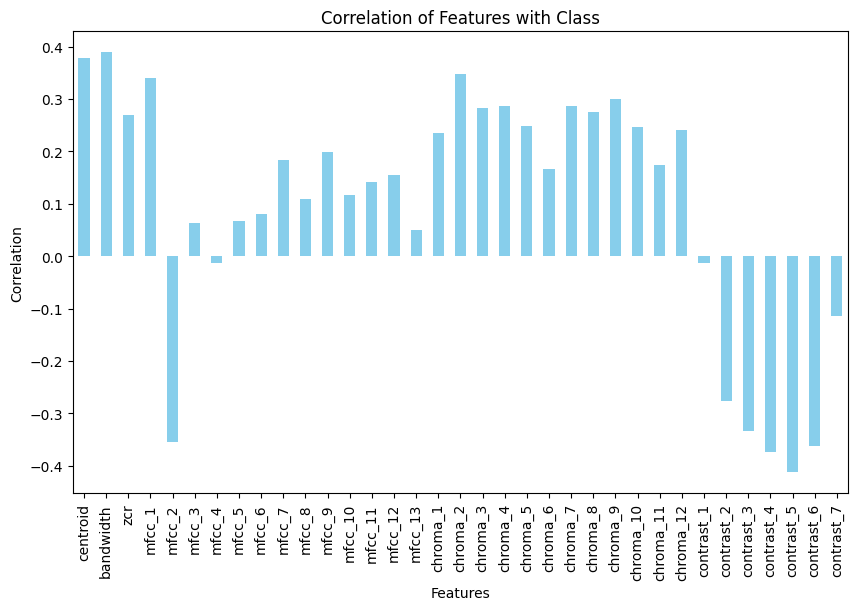

In [24]:
# Plotting the correlation with class_encoded
plt.figure(figsize=(10, 6))
corr_matrix.drop('class').plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Class')
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.show()


In [25]:
df.describe()

,class,centroid,bandwidth,zcr,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,...,chroma_10,chroma_11,chroma_12,contrast_1,contrast_2,contrast_3,contrast_4,contrast_5,contrast_6,contrast_7
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,4.499499,2202.419119,2242.763943,0.103651,-144.530182,99.531219,-8.928433,36.305717,-1.152302,14.642807,...,0.399286,0.375323,0.373643,21.617089,16.297343,19.616393,19.315526,19.291462,18.779647,28.685736
std,2.875114,716.076969,526.517009,0.041824,100.263542,31.331608,21.697615,16.665541,12.226306,11.842525,...,0.118659,0.115033,0.115663,4.009204,2.269189,2.778270,2.760450,2.556411,2.233644,11.289041
min,0.000000,570.349904,900.409298,0.021697,-552.158630,-1.471578,-89.865089,-18.756536,-38.911594,-28.404940,...,0.111275,0.061216,0.091698,12.866114,10.635942,11.629448,13.940119,14.029905,14.596196,13.257530
25%,2.000000,1626.527014,1907.133128,0.070374,-200.912971,76.771477,-24.217862,24.134965,-9.992895,5.087457,...,0.313846,0.295381,0.292379,18.741967,14.682624,17.648509,17.440544,17.542735,17.148248,16.470682
50%,4.000000,2209.486740,2221.373053,0.099503,-120.349419,98.435829,-10.736386,36.968815,-0.040610,15.040485,...,0.390952,0.372729,0.373622,20.849166,15.883508,19.128715,18.808446,18.776079,18.241572,31.748383
75%,7.000000,2691.962733,2578.883006,0.132097,-73.818314,119.790993,5.540233,48.251513,7.921215,23.851683,...,0.482621,0.447586,0.444420,24.155845,17.627813,21.231597,20.728605,20.759801,19.941015,39.918040
max,9.000000,4435.732059,3509.656096,0.274631,42.091450,193.074463,56.646450,80.698349,31.428146,45.175888,...,0.775460,0.802365,0.796880,37.024049,24.984341,29.743913,30.059847,31.926450,27.955666,46.506639


<Axes: xlabel='chroma_1', ylabel='Density'>

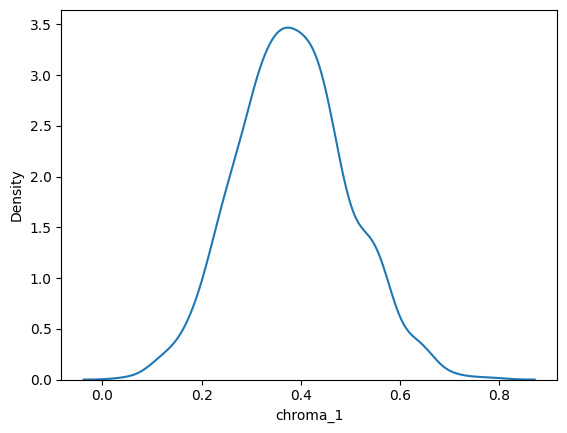

In [26]:
sns.kdeplot(df['chroma_1'])

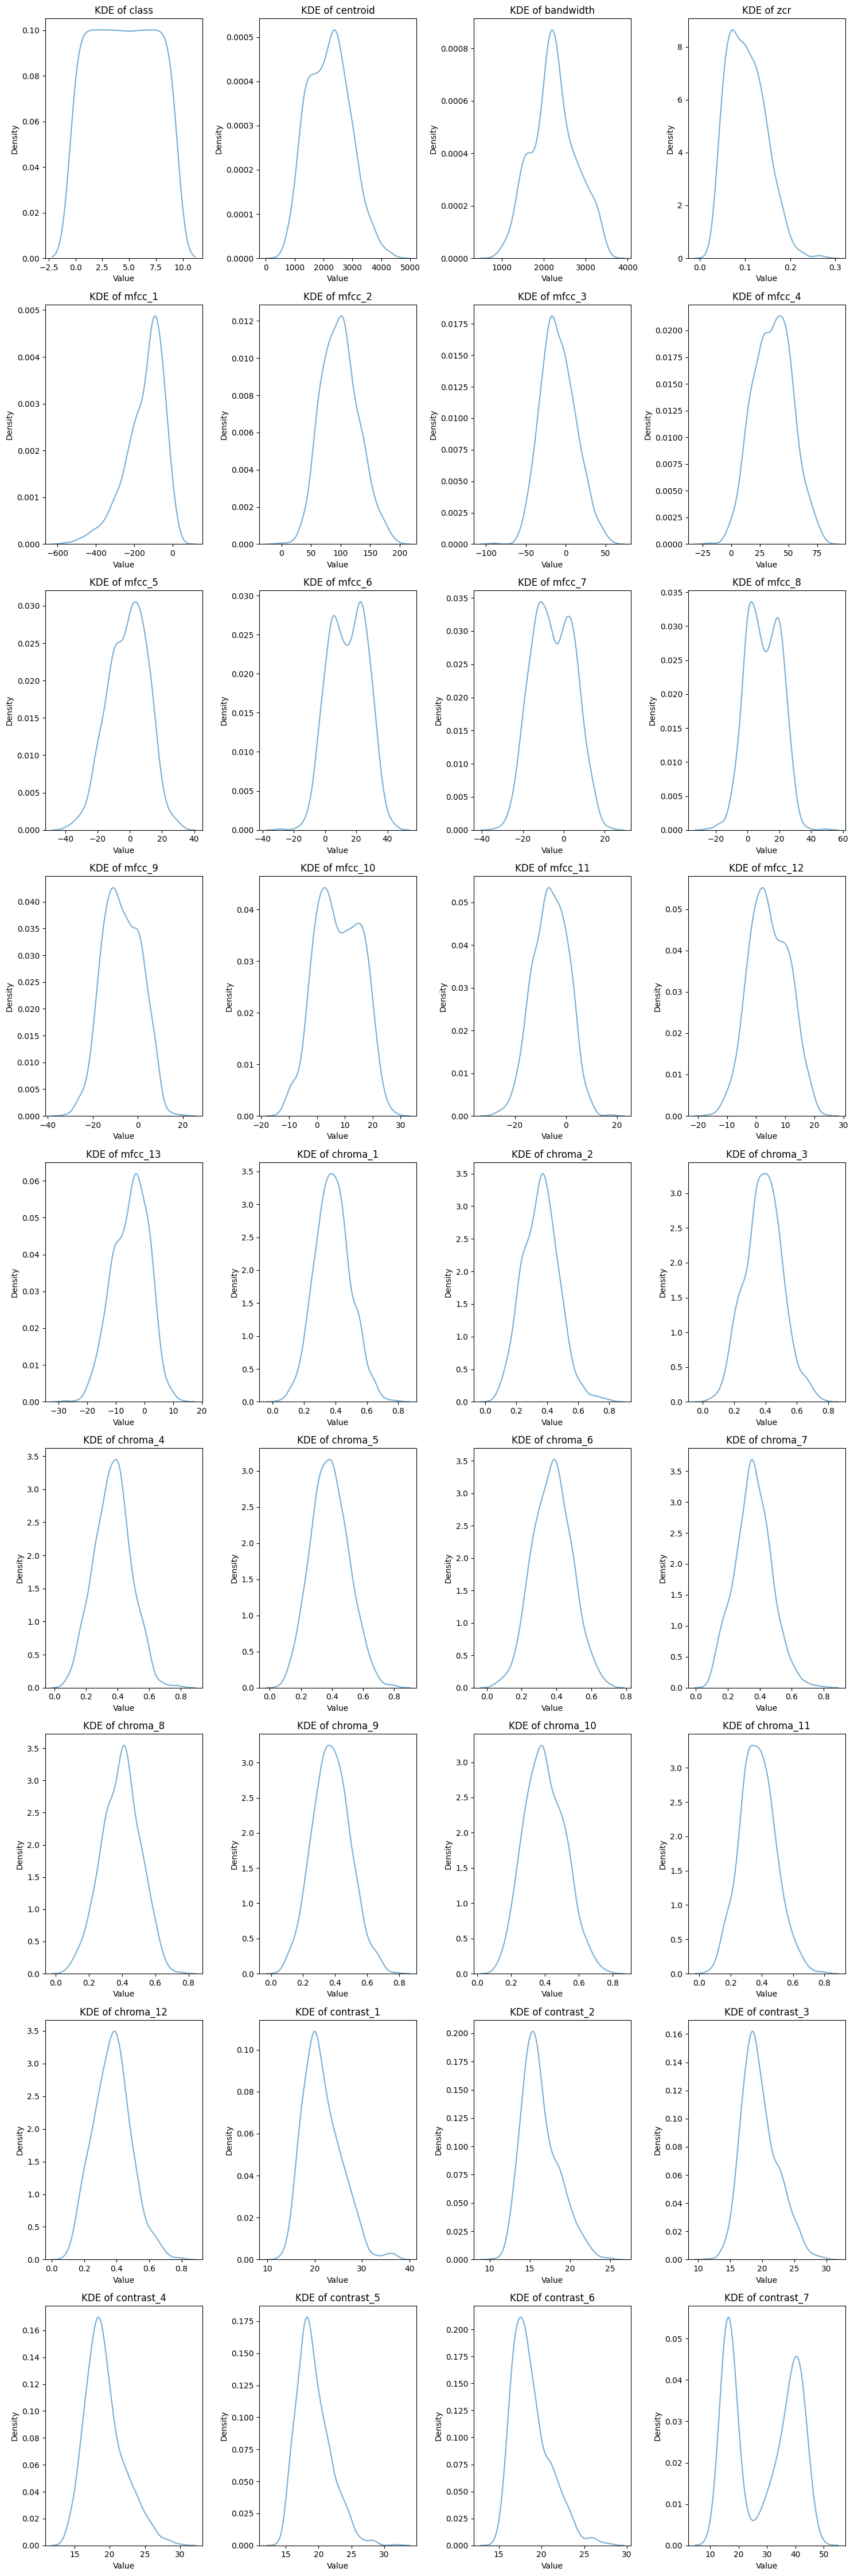

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'float32', 'int64']).columns

# Number of rows and columns for subplots (adjust to fit your data)
n_cols = 4  # Number of columns in subplot grid
n_rows = (len(numerical_columns) // n_cols) + (1 if len(numerical_columns) % n_cols != 0 else 0)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array to easily iterate over
axes = axes.flatten()

# Plotting each numerical column's KDE in a subplot
for i, column in enumerate(numerical_columns):
    sns.kdeplot(df[column], ax=axes[i], alpha=0.6)
    axes[i].set_title(f'KDE of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

# Hide any unused subplots (if the grid is larger than the number of columns)
for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['class']))

In [29]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=5)
# df_pca = pca.fit_transform(df_scaled)

In [30]:
# df_pca.shape

In [31]:
from sklearn.model_selection import train_test_split
X = df_scaled
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.665
              precision    recall  f1-score   support

           0       0.43      0.50      0.46        12
           1       0.81      0.85      0.83        20
           2       0.62      0.68      0.65        19
           3       0.44      0.32      0.37        22
           4       0.60      0.67      0.63        18
           5       0.76      0.81      0.79        27
           6       0.87      0.95      0.91        21
           7       0.91      0.83      0.87        24
           8       0.67      0.55      0.60        22
           9       0.25      0.27      0.26        15

    accuracy                           0.67       200
   macro avg       0.63      0.64      0.64       200
weighted avg       0.66      0.67      0.66       200

[[ 6  0  1  1  0  2  0  0  0  2]
 [ 0 17  1  0  0  2  0  0  0  0]
 [ 2  0 13  0  0  1  0  1  0  2]
 [ 2  1  2  7  1  1  1  0  2  5]
 [ 1  0  0  1 12  0  2  1  1  0]
 [ 1  1  0  0  0 22  0  0  1  2]
 [ 0  0  0  0  1  0 20  0  

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# KNN

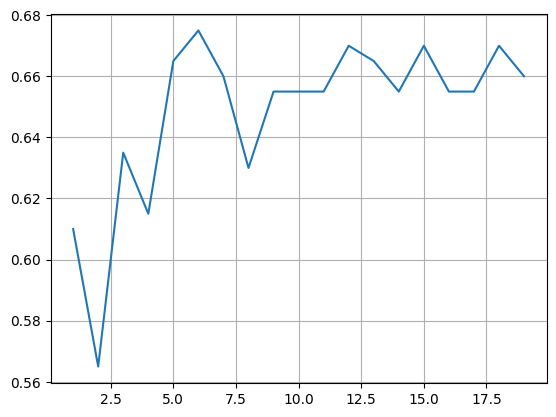

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

accuracy = []
for i in range(1,20):
  model.set_params(n_neighbors=i)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(range(1,20),accuracy)
plt.grid(True)
plt.show()

# desition tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.465
              precision    recall  f1-score   support

           0       0.38      0.42      0.40        12
           1       0.89      0.80      0.84        20
           2       0.22      0.21      0.22        19
           3       0.35      0.27      0.31        22
           4       0.26      0.28      0.27        18
           5       0.45      0.48      0.46        27
           6       0.68      0.71      0.70        21
           7       0.77      0.83      0.80        24
           8       0.44      0.36      0.40        22
           9       0.05      0.07      0.06        15

    accuracy                           0.47       200
   macro avg       0.45      0.44      0.45       200
weighted avg       0.47      0.47      0.47       200

[[ 5  0  0  1  0  3  1  0  1  1]
 [ 1 16  3  0  0  0  0  0  0  0]
 [ 0  0  4  0  1  7  0  3  1  3]
 [ 4  1  3  6  4  1  0  0  0  3]
 [ 1  0  0  4  5  0  3  0  3  2]
 [ 1  1  3  1  0 13  0  1  4  3]
 [ 0  0  0  0  2  0 15  0  

# svm

In [35]:
from sklearn.svm import SVC
model = SVC(kernel='rbf',decision_function_shape='ovr')  # One-vs-rest

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.685
              precision    recall  f1-score   support

           0       0.50      0.42      0.45        12
           1       0.81      0.85      0.83        20
           2       0.59      0.84      0.70        19
           3       0.68      0.59      0.63        22
           4       0.62      0.72      0.67        18
           5       0.78      0.67      0.72        27
           6       0.86      0.90      0.88        21
           7       0.83      0.79      0.81        24
           8       0.70      0.64      0.67        22
           9       0.21      0.20      0.21        15

    accuracy                           0.69       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.69      0.69      0.68       200

[[ 5  0  2  1  0  2  0  0  0  2]
 [ 0 17  2  0  0  1  0  0  0  0]
 [ 1  0 16  0  0  1  0  1  0  0]
 [ 1  1  0 13  2  0  1  0  1  3]
 [ 1  0  0  0 13  0  1  2  0  1]
 [ 1  2  2  0  0 18  0  1  2  1]
 [ 0  0  0  0  0  0 19  0  

# naive baise

In [36]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))


Accuracy: 0.495
              precision    recall  f1-score   support

           0       0.24      0.42      0.30        12
           1       0.65      0.85      0.74        20
           2       0.50      0.42      0.46        19
           3       0.56      0.23      0.32        22
           4       0.43      0.33      0.38        18
           5       0.45      0.33      0.38        27
           6       0.69      0.95      0.80        21
           7       0.51      0.83      0.63        24
           8       0.56      0.23      0.32        22
           9       0.24      0.27      0.25        15

    accuracy                           0.49       200
   macro avg       0.48      0.49      0.46       200
weighted avg       0.50      0.49      0.47       200

[[ 5  2  1  0  0  1  1  0  0  2]
 [ 0 17  0  0  0  3  0  0  0  0]
 [ 4  0  8  0  0  4  0  3  0  0]
 [ 1  1  0  5  1  0  2  5  1  6]
 [ 1  0  0  0  6  0  5  5  0  1]
 [ 7  6  1  0  0  9  0  3  1  0]
 [ 0  0  0  0  0  0 20  0  

# ensamble learning

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        12
           1       0.86      0.90      0.88        20
           2       0.65      0.68      0.67        19
           3       0.71      0.55      0.62        22
           4       0.60      0.67      0.63        18
           5       0.71      0.74      0.73        27
           6       0.91      0.95      0.93        21
           7       0.80      0.83      0.82        24
           8       0.65      0.59      0.62        22
           9       0.25      0.20      0.22        15

    accuracy                           0.69       200
   macro avg       0.66      0.67      0.66       200
weighted avg       0.69      0.69      0.69       200

[[ 7  1  0  1  0  2  0  0  1  0]
 [ 0 18  1  0  0  0  0  0  0  1]
 [ 1  0 13  0  0  2  0  1  1  1]
 [ 3  1  1 12  2  0  0  0  0  3]
 [ 1  0  0  0 12  0  2  2  0  1]
 [ 1  1  1  1  0 20  0  1  1  1]
 [ 0  0  0  0  0  0 20  0  0

In [38]:
from xgboost import XGBClassifier
model = XGBClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.46      0.50      0.48        12
           1       0.85      0.85      0.85        20
           2       0.50      0.74      0.60        19
           3       0.63      0.55      0.59        22
           4       0.45      0.50      0.47        18
           5       0.86      0.67      0.75        27
           6       0.78      0.86      0.82        21
           7       0.77      0.83      0.80        24
           8       0.93      0.59      0.72        22
           9       0.19      0.20      0.19        15

    accuracy                           0.65       200
   macro avg       0.64      0.63      0.63       200
weighted avg       0.68      0.65      0.65       200

[[ 6  0  3  0  0  2  1  0  0  0]
 [ 0 17  2  0  0  0  0  0  0  1]
 [ 0  1 14  0  1  1  0  1  0  1]
 [ 1  1  1 12  3  0  0  0  0  4]
 [ 1  0  0  1  9  0  4  3  0  0]
 [ 0  1  2  0  1 18  0  1  0  4]
 [ 0  0  0  1  0  0 18  0  0

# ANN

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense ,BatchNormalization

model = models.Sequential([
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    layers.Dense(64, activation='tanh'),
    BatchNormalization(),
    layers.Dense(10, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0005),
              loss='sparse_categorical_crossentropy',  # Use sparse categorical cross-entropy for integer labels
              metrics=['accuracy']
)

call_back = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [41]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test,y_test),callbacks=[call_back])

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.0955 - loss: 2.9272 - val_accuracy: 0.2400 - val_loss: 2.1330
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2857 - loss: 2.0450 - val_accuracy: 0.3250 - val_loss: 1.8944
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4202 - loss: 1.6451 - val_accuracy: 0.3750 - val_loss: 1.7636
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5123 - loss: 1.4168 - val_accuracy: 0.4150 - val_loss: 1.6795
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5460 - loss: 1.3180 - val_accuracy: 0.4250 - val_loss: 1.6135
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5692 - loss: 1.2191 - val_accuracy: 0.4800 - val_loss: 1.5412
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5895 - loss: 1.1561 - val_accuracy: 0.4900 - val_loss: 1.4920
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6500 - loss: 1.0406 - val_accuracy: 0.5200 - val_l

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU

model = Sequential()
model.add(Dense(128, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(64, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(32, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-5)

# Convert y_train to one-hot encoded format
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=10)

history = model.fit(X_train,
                    y_train_encoded,
                    epochs=50,
                    batch_size=64,
                    # callbacks=[early_stop, reduce_lr],
                    validation_split=0.2,
                    verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.1293 - loss: 2.4471 - val_accuracy: 0.2000 - val_loss: 2.2237
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1919 - loss: 2.1593 - val_accuracy: 0.3125 - val_loss: 2.1466
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3021 - loss: 2.0264 - val_accuracy: 0.3375 - val_loss: 2.0648
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3396 - loss: 1.9336 - val_accuracy: 0.3500 - val_loss: 1.9816
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3947 - loss: 1.7585 - val_accuracy: 0.3438 - val_loss: 1.9042
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4242 - loss: 1.6680 - val_accuracy: 0.3812 - val_loss: 1.8262
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4833 - loss: 1.5639 - val_accuracy: 0.4187 - val_loss: 1.7569
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4904 - loss: 1.4868 - val_accuracy: 0.4563 - v